Clustering con el Modelo k-means al Dataframe Forbes 2022

¿Qué es el aprendizaje no supervisado?
El aprendizaje no supervisado, también conocido como machine learning no supervisado, utiliza algoritmos de machine learning para analizar y agrupar en clústeres conjuntos de datos sin etiquetar. Estos algoritmos descubren agrupaciones de datos o patrones ocultos sin necesidad de ninguna intervención humana. Su capacidad de descubrir similitudes y diferencias en la información lo convierten en la solución ideal para el análisis de datos exploratorios, las estrategias de venta cruzada, la segmentación de clientes y el reconocimiento de imágenes.

Enfoques comunes del aprendizaje no supervisado
Los modelos de aprendizaje no supervisado se utilizan para tres tareas principales: agrupación en clústeres, asociación y reducción de dimensionalidad. A continuación, definiremos cada método de aprendizaje y resaltaremos los algoritmos y los enfoques comunes para aplicarlos de manera efectiva.

Agrupación en clústeres
La agrupación en clústeres es una técnica de minería de datos que agrupa datos no etiquetados en función de sus similitudes o diferencias. Los algoritmos de agrupación en clústeres se utilizan para procesar objetos de datos sin clasificar y sin procesar en grupos representados por estructuras o patrones en la información. Los algoritmos de agrupación en clústeres se pueden clasificar en varios tipos, específicamente: exclusivos, superpuestos, jerárquicos y probabilísticos.

Clústeres exclusivos y superpuestos
La agrupación en clústeres exclusiva es una forma de agrupación que estipula que un punto de datos solo puede existir en un clúster. Esto también puede denominarse agrupación en clústeres "dura". El algoritmo de agrupación en clústeres k-medias (k-means) es un ejemplo de agrupación exclusiva.

La agrupación en clústeres de k-medias es un ejemplo común de un método de agrupación en clústeres exclusiva en el que los puntos de datos se asignan en K grupos, donde K representa el número de clústeres en función de la distancia desde el centroide de cada grupo. Los puntos de datos más próximos a un determinado centroide se agruparán en la misma categoría. Un valor K más grande será indicativo de agrupaciones más pequeñas con más granularidad, mientras que un valor K más pequeño tendrá agrupaciones más grandes y menos granularidad. Las agrupaciones en clústeres de k-medias se suelen utilizar en la segmentación de mercados, la agrupación de documentos en clústeres, la segmentación de imágenes y la compresión de imágenes.
Los clústeres superpuestos difieren de la agrupación en clústeres exclusiva en que permiten que los puntos de datos pertenezcan a varios clústeres con diferentes grados de pertenencia. La agrupación en clústeres de k-medias "suave" o difusa es un ejemplo de agrupación superpuesta.

In [73]:
#Comenzaremos importando las librerías que nos asistirán para ejecutar el algoritmo y graficar.

import os #establecer directorios de trabajo
import numpy as np # Métodos numéricos y manipulación de array
import matplotlib.pyplot as plt #Data frame
import seaborn as sns; sns.set() #componente gráfico
import seaborn as sb
import pandas as pd # Data frame
import pandas as py # Data frame
from scipy.spatial import distance
from sklearn.preprocessing import  MinMaxScaler
from sklearn.cluster import KMeans # se utiliza para el clustering
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [74]:
## Establecer directorio de trabajo  e importar el Dataframe forbes2022
os.chdir('C:\\Users\\andre\\OneDrive\\Escritorio\\Inteligencia artificial\\UNIDAD 1')
print(os.getcwd())
print(os.listdir())

C:\Users\andre\OneDrive\Escritorio\Inteligencia artificial\UNIDAD 1
['1. Introduccion.ipynb', '2. Numpy.ipynb', '3. PandasForbes.ipynb', 'Actividad 1.docx', 'Actividad 1.pdf', 'Data set', 'Untitled-1.ipynb']


In [75]:
# Importamos el archivo csv -para simplificar, suponemos que el archivo se encuentra en el mismo
# directorio que el notebook- y vemos los primeros 5 registros del archivo tabulados.

# Import and pre-visualization
df = pd.read_csv('Data set/Forbes_2000_2022.csv',encoding= 'latin-1',sep=';')
df.head()


,Rank,Company,Country,Sales,Profits,Assets,Market_Value
0,1,JPMorgan Chase,United States,179930,41800,3744300,399590
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589470,156360,660990,2055220
2,3,ICBC,China,216770,52470,6116820,203010
3,4,China Construction Bank,China,203080,48250,4977480,172990
4,5,Agricultural Bank of China,China,186140,37920,5356860,141820


In [76]:
print(df.dtypes)

Rank             int64
Company         object
Country         object
Sales            int64
Profits         object
Assets           int64
Market_Value     int64
dtype: object


In [77]:
print(df.shape)
print(df.columns)


(2000, 7)
Index(['Rank', 'Company', 'Country', 'Sales', 'Profits', 'Assets',
       'Market_Value'],
      dtype='object')


In [78]:
# Para ver la FORMA del DF
df.shape # (Fila,columna)

(2000, 7)

In [79]:
### Data cleaning 

# Qué variables tengo

df.columns

Index(['Rank', 'Company', 'Country', 'Sales', 'Profits', 'Assets',
       'Market_Value'],
      dtype='object')

In [80]:
#Cambiar nombre de variables
df.columns = ['Rank','Company','Country','Sales','Profits','Assets','Market_value']
df.columns

Index(['Rank', 'Company', 'Country', 'Sales', 'Profits', 'Assets',
       'Market_value'],
      dtype='object')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          2000 non-null   int64 
 1   Company       2000 non-null   object
 2   Country       2000 non-null   object
 3   Sales         2000 non-null   int64 
 4   Profits       2000 non-null   object
 5   Assets        2000 non-null   int64 
 6   Market_value  2000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 109.5+ KB


In [82]:
#También podemos ver una tabla de información estadística que nos provee Pandas dataframe:
df.describe()

,Rank,Sales,Assets,Market_value
count,2000.000000,2000.000000,2.000000e+03,2.000000e+03
mean,1000.309500,25422.461000,1.158463e+05,3.699562e+04
std,577.395083,46517.172959,3.722422e+05,1.142306e+05
min,1.000000,-109990.000000,1.050000e+02,3.200000e+01
25%,500.750000,5770.000000,1.472000e+04,6.860000e+03
50%,1000.500000,12500.000000,3.165500e+04,1.531000e+04
75%,1499.500000,25170.000000,7.697250e+04,3.404250e+04
max,1999.000000,611290.000000,6.116820e+06,2.746210e+06


In [83]:
df=df.replace(',','',regex= True)
df.head()

,Rank,Company,Country,Sales,Profits,Assets,Market_value
0,1,JPMorgan Chase,United States,179930,41800,3744300,399590
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589470,156360,660990,2055220
2,3,ICBC,China,216770,52470,6116820,203010
3,4,China Construction Bank,China,203080,48250,4977480,172990
4,5,Agricultural Bank of China,China,186140,37920,5356860,141820


In [84]:
df=df.replace('\$','',regex=True)


In [85]:
df = df.astype(str).apply(lambda x: x.str.replace('[^\w\s]',''))

In [86]:
import string
df= df.astype(str).apply(lambda x: x.str.replace('[{}]'.format(string.punctuation), ''))

In [87]:
print(df.groupby('Rank').size())

Rank
1       1
10      1
100     1
1000    1
1001    1
       ..
994     1
995     1
996     2
998     1
999     1
Length: 1669, dtype: int64


Normalizacion de datos 
La normalización permite realizar comparaciones más precisas entre los puntos de datos. Si dos puntos de datos están en escalas diferentes, puede ser difícil saber si son realmente diferentes entre sí o si la diferencia se debe sólo a la escala. La normalización de los datos elimina este problema.

In [88]:
# Se eliminan filas que tengan valor NaN.
df = df.dropna()
df = df.reset_index(drop=True)

In [89]:
df.head(n=10)

,Rank,Company,Country,Sales,Profits,Assets,Market_value
0,1,JPMorgan Chase,United States,179930,41800,3744300,399590
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589470,156360,660990,2055220
2,3,ICBC,China,216770,52470,6116820,203010
3,4,China Construction Bank,China,203080,48250,4977480,172990
4,5,Agricultural Bank of China,China,186140,37920,5356860,141820
5,6,Bank of America,United States,133840,28620,3194660,220820
6,7,Alphabet,United States,282850,58590,369490,1340530
7,8,ExxonMobil,United States,393160,61690,369370,439390
8,9,Microsoft,United States,207590,69020,380090,2309840
9,10,Apple,United States,385100,94320,332160,2746210


In [90]:
# Se pregunta si hay datos vacios.
df.isna().sum()  

Rank            0
Company         0
Country         0
Sales           0
Profits         0
Assets          0
Market_value    0
dtype: int64

In [91]:
df.iloc[:,3:] = df.iloc[:,3:].astype(float)

In [92]:
# filtrar datos mediante indices con la funcion iloc y cambiar el tipo de dato a float con la funcion astype.
df['Sales']=df['Sales'].astype(float)
df['Market_value']=df['Market_value'].astype(float)
df['Assets']=df['Assets'].astype(float)
df['Profits']=df['Profits'].astype(float)

In [93]:
# sumar
df['Sales'].sum()

50844922.0

In [94]:
df['Profits'].sum()

7666268.0

In [95]:
df.dtypes 

Rank             object
Company          object
Country          object
Sales           float64
Profits         float64
Assets          float64
Market_value    float64
dtype: object

In [96]:
#Coercionar datos

df.iloc[:,3:].astype(float) 

,Sales,Profits,Assets,Market_value
0,179930.0,41800.0,3744300.0,399590.0
1,589470.0,156360.0,660990.0,2055220.0
2,216770.0,52470.0,6116820.0,203010.0
3,203080.0,48250.0,4977480.0,172990.0
4,186140.0,37920.0,5356860.0,141820.0
...,...,...,...,...
1995,5350.0,4895.0,7820.0,15600.0
1996,15620.0,-202.0,11390.0,3170.0
1997,3340.0,916.0,43220.0,5600.0
1998,556.0,1671.0,42970.0,2490.0


In [97]:
# Preguntar si hay datos vacios 

df.isna().any() # Método de Pandas 

Rank            False
Company         False
Country         False
Sales           False
Profits         False
Assets          False
Market_value    False
dtype: bool

In [98]:
# se pregunta si alguno de los elementos de una lista esta vacio anidando con la funcion any
df.isna().any().any()  

False

In [99]:
df.isnull().sum()

Rank            0
Company         0
Country         0
Sales           0
Profits         0
Assets          0
Market_value    0
dtype: int64

In [100]:
df

,Rank,Company,Country,Sales,Profits,Assets,Market_value
0,1,JPMorgan Chase,United States,179930.0,41800.0,3744300.0,399590.0
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589470.0,156360.0,660990.0,2055220.0
2,3,ICBC,China,216770.0,52470.0,6116820.0,203010.0
3,4,China Construction Bank,China,203080.0,48250.0,4977480.0,172990.0
4,5,Agricultural Bank of China,China,186140.0,37920.0,5356860.0,141820.0
...,...,...,...,...,...,...,...
1995,1996,Alfa Laval,Sweden,5350.0,4895.0,7820.0,15600.0
1996,1996,Gap,United States,15620.0,-202.0,11390.0,3170.0
1997,1996,Yes Bank,India,3340.0,916.0,43220.0,5600.0
1998,1999,BEKB-BCBE,Switzerland,556.0,1671.0,42970.0,2490.0


In [101]:
# La función describe de Pandas regresa estadísticas descriptivas incluyendo: media, meadiana, máx, mín, std y conteos para una columna en particular de los datos. Solo regresa los valores de estas estadísticas para las columnas numéricas.
df.columns = ['Rank','Company','Country','Sales','Profits','Assets','Market_value']
df.columns
df.describe() 

,Sales,Profits,Assets,Market_value
count,2000.000000,2000.000000,2.000000e+03,2.000000e+03
mean,25422.461000,3833.134000,1.158463e+05,3.699562e+04
std,46517.172959,6919.101006,3.722422e+05,1.142306e+05
min,-109990.000000,-76170.000000,1.050000e+02,3.200000e+01
25%,5770.000000,1220.000000,1.472000e+04,6.860000e+03
50%,12500.000000,2575.500000,3.165500e+04,1.531000e+04
75%,25170.000000,5872.750000,7.697250e+04,3.404250e+04
max,611290.000000,156360.000000,6.116820e+06,2.746210e+06


In [102]:
print(df.groupby('Sales').size()) #Para saber cuantos registros tiene de cada uno

Sales
-109990.0    1
-74520.0     1
-38600.0     1
-25510.0     1
-9090.0      1
            ..
 453560.0    1
 457400.0    1
 524900.0    1
 589470.0    1
 611290.0    1
Length: 1568, dtype: int64


Visualización de Datos
Veremos graficamente nuestros datos para tener una idea de la dispersión de los mismos:

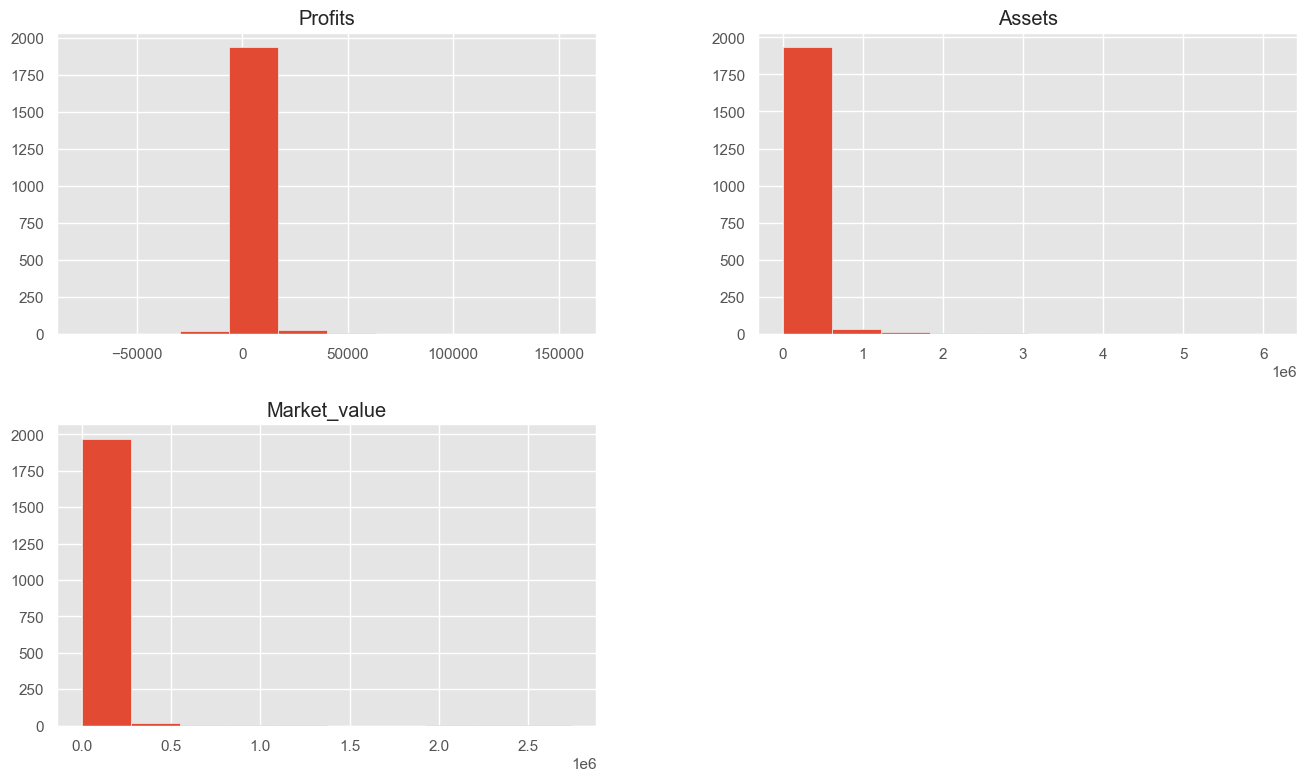

In [103]:
df.drop(['Sales'], axis=1).hist() #Ver graficamente los datos para tener una idea de la dispersión de los mismos:
plt.show()

In [104]:
print(df.dtypes)

Rank             object
Company          object
Country          object
Sales           float64
Profits         float64
Assets          float64
Market_value    float64
dtype: object


Representación gráfica de los datos

Ahora se va ha echar un vistazo a la representación gráfica de los datos. En el eje x se representa las ventas (Sales) y en el eje y Assets (activos):

In [118]:
# Definir la entrada
# Se Concreta la estructura de datos que se utilizara para alimentar el algoritmo. Como se ve, sólo se cargo las columnas Rank, Assets y Market_value en la variable X.

x = np.array(df[["Rank","Assets","Market_value"]])
y = np.array(df['Sales'])
x.shape

(2000, 3)

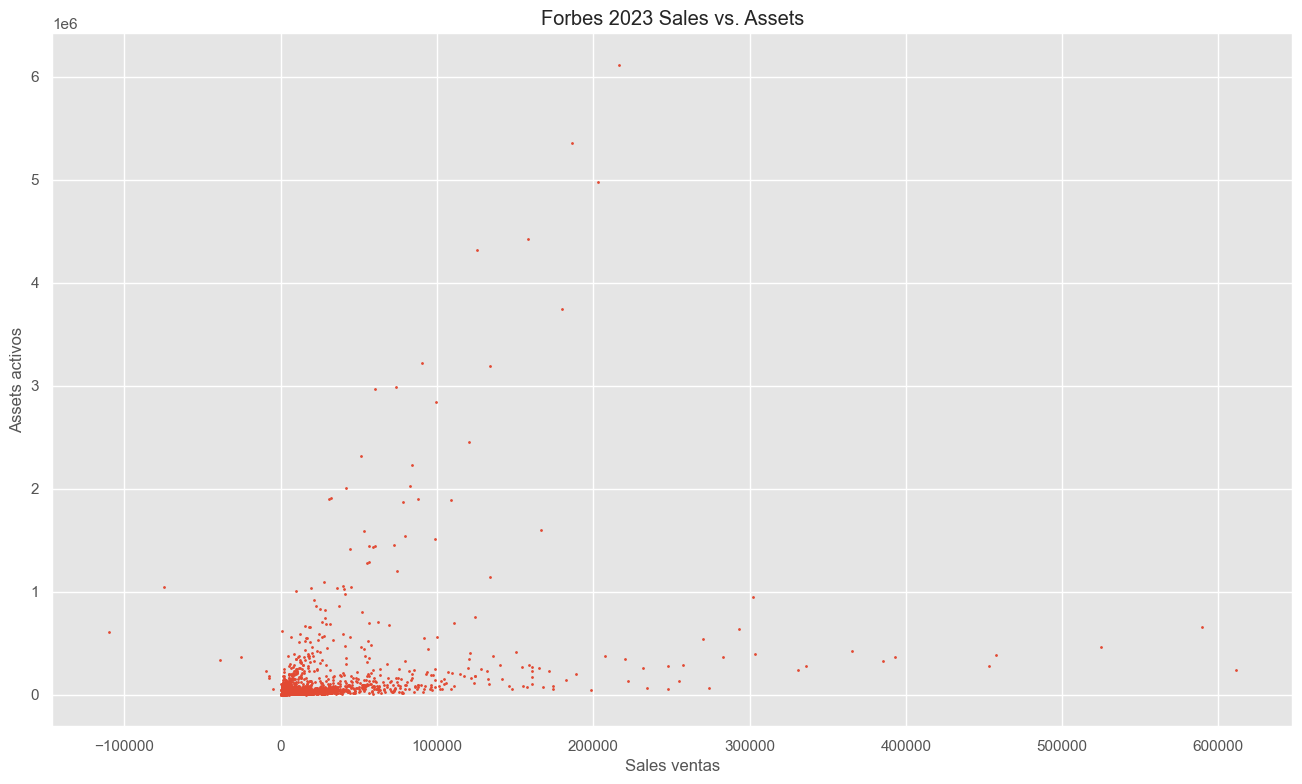

In [106]:
#%% Representación gráfica de los datos.
df_escalado=df
x = df_escalado['Sales'].values
y = df_escalado['Assets'].values
plt.xlabel('Sales ventas')
plt.ylabel('Assets activos')
plt.title('Forbes 2023 Sales vs. Assets')
plt.plot(x,y,'o',markersize=1)

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

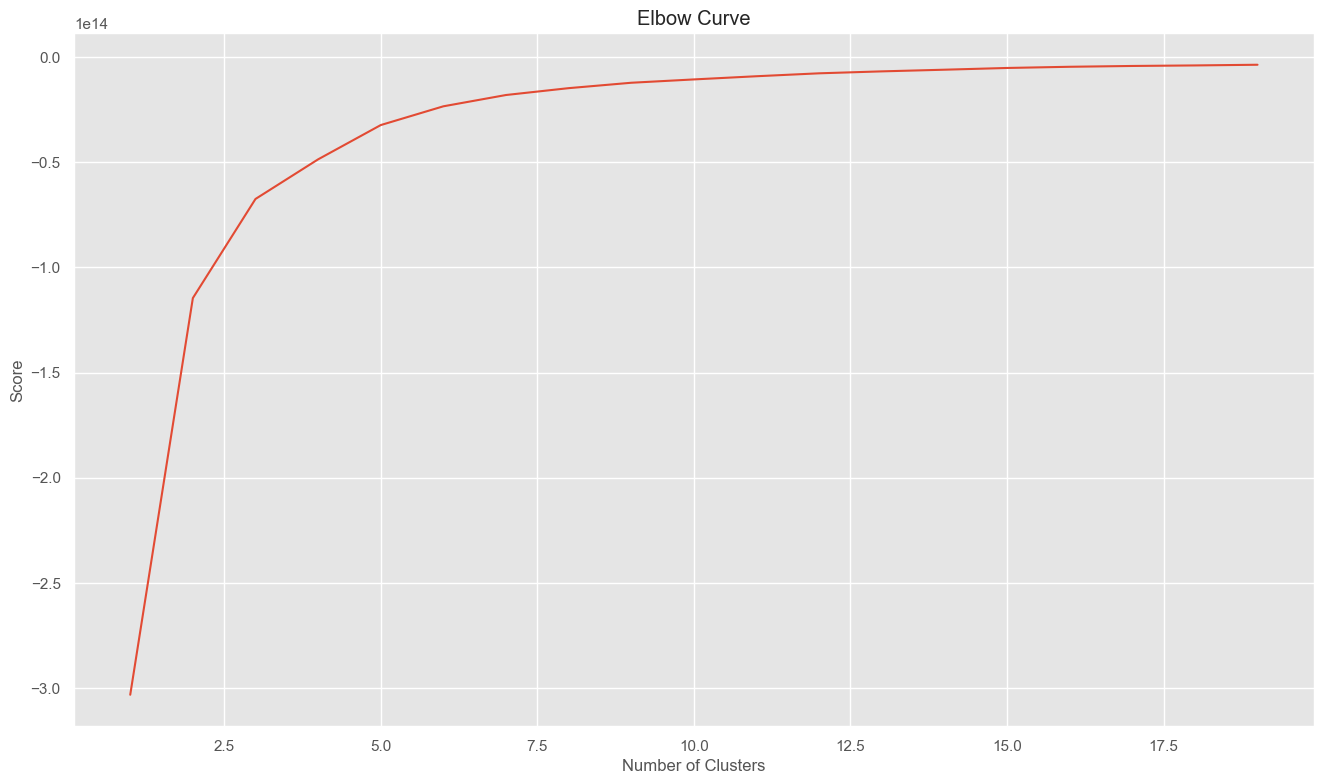

In [119]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Realmente la curva es bastante “suave”. Considero a 5 como un buen número para K.

Se ejecuta K-Means Se Ejecutara el algoritmo para 5 clusters y se obtienen las etiquetas y los centroids.



In [120]:
kmeans = KMeans(n_clusters=5).fit(x)
centroids = kmeans.cluster_centers_
print(centroids)

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[1.05193002e+03 5.09513649e+04 3.00059989e+04]
 [8.95000000e+01 2.04796667e+06 7.99402917e+04]
 [3.09881720e+02 6.02352151e+05 5.72579677e+04]
 [6.25000000e+01 4.82244667e+06 1.73431833e+05]
 [1.28000000e+01 4.41422000e+05 1.90717200e+06]]


Representación gráfica de los clústeres k-means

Una vez con los datos etiquetados, podemos visualizar gráficamente en dos dimensiones el clustering realizado por k-means, ya que se usaron sólo dos variables.

In [121]:
# df Conjunto de datos de entrada
df = np.random.randint(1, 101, size=(20, 2))
print(df)

[[54 80]
 [ 2 71]
 [76  6]
 [37 53]
 [44 30]
 [59 58]
 [19 73]
 [16 38]
 [28 72]
 [55  9]
 [23 84]
 [49 55]
 [ 9 79]
 [94 99]
 [34 30]
 [21 31]
 [58 66]
 [79 14]
 [88 31]
 [ 9 72]]


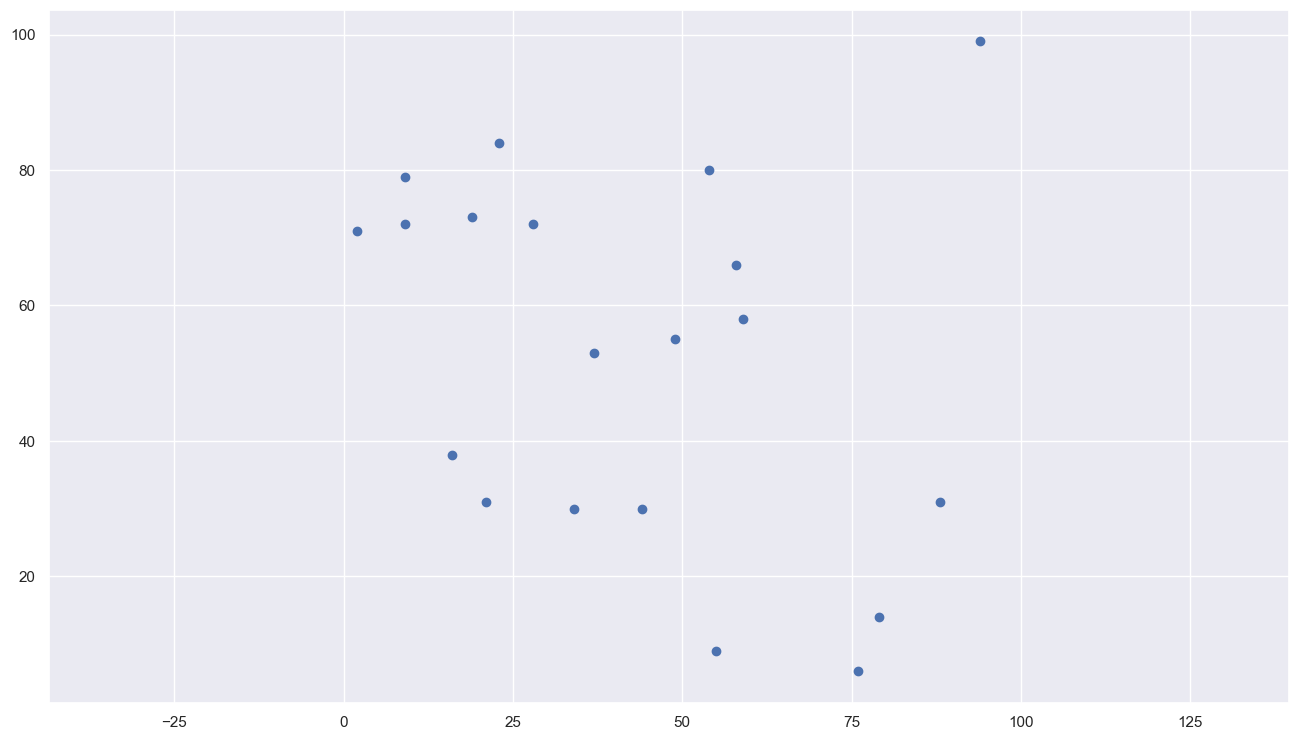

In [122]:
# Realicemos un scatterplo
sns.set()

plt.axis('equal') #Misma escala de los ejes
plt.scatter(df[:,0],df[:,1])

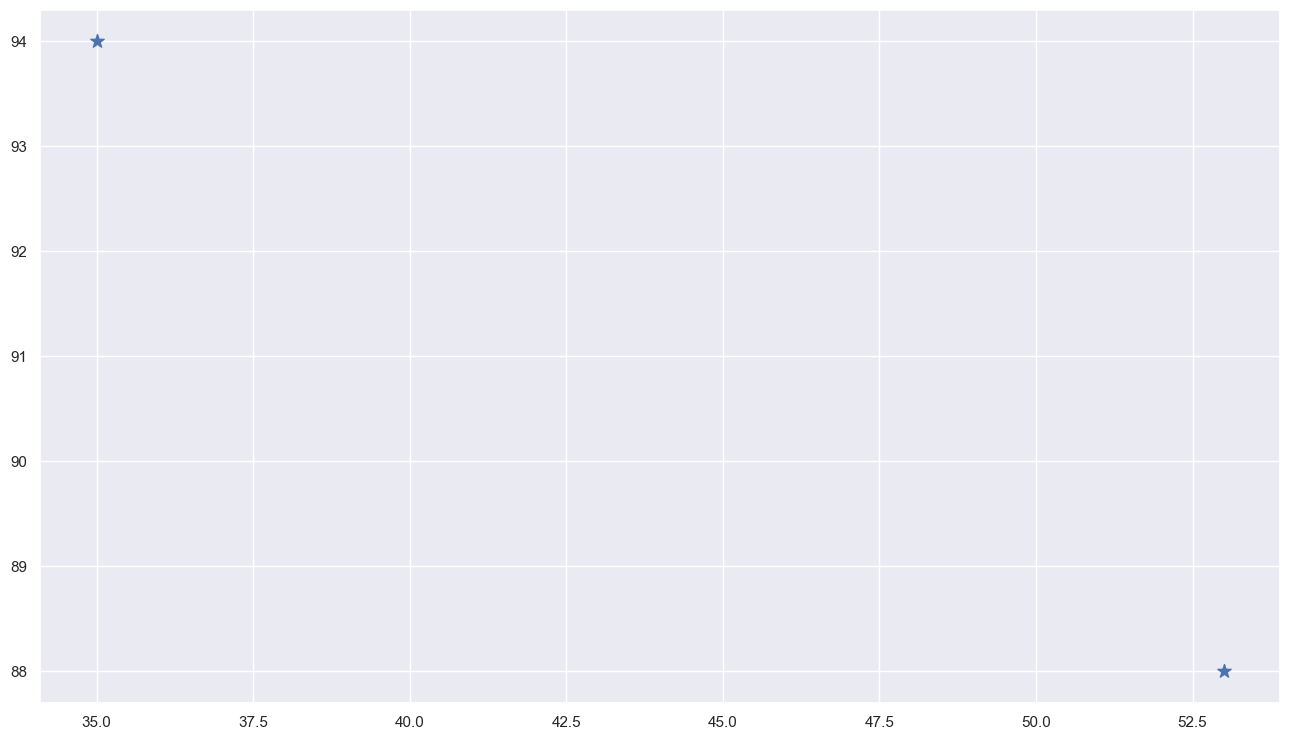

[53 88] [35 94]


In [123]:
# Iniciamos los centroides
ck = np.random.randint(np.min(df),np.max(df), size=(2, 2))

plt.scatter(ck[:,0],ck[:,1],s=100,marker='*')
plt.show()
print(ck[0,:],ck[1,:])

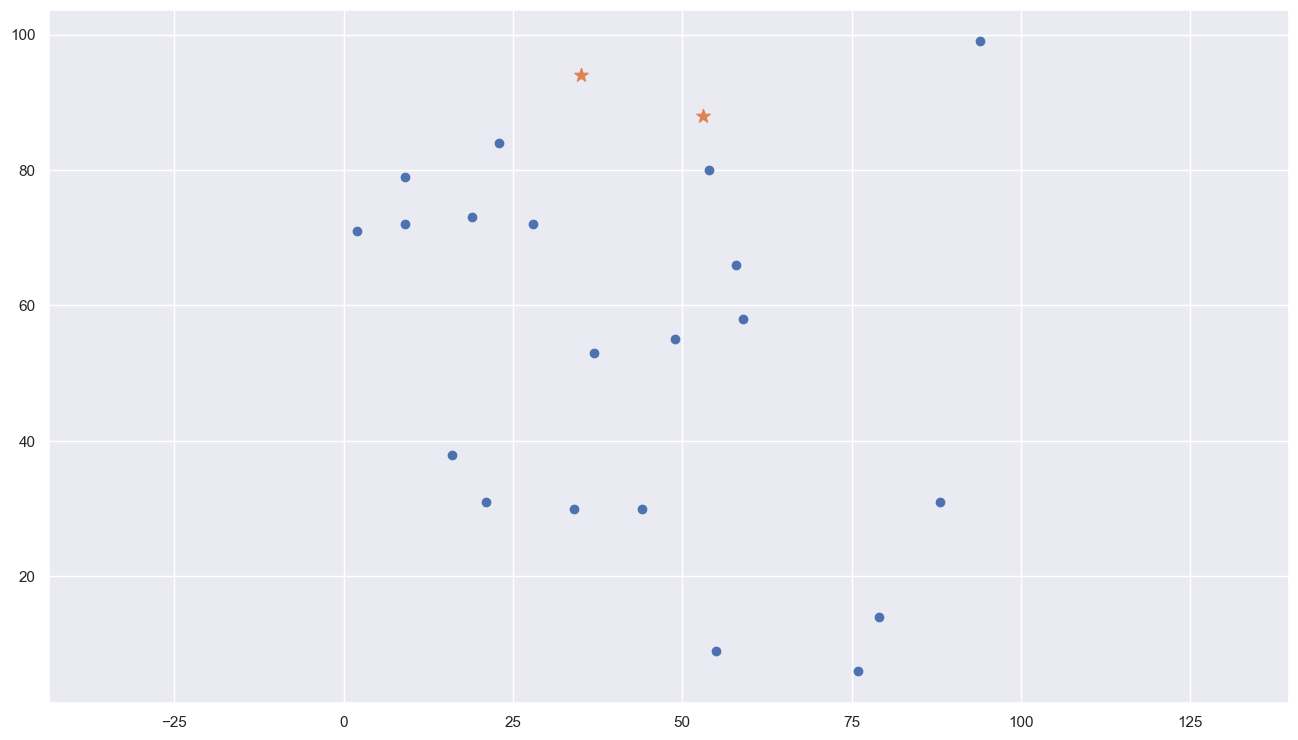

[53 88] [35 94]


In [124]:
plt.axis('equal') #Misma escala de los ejes
plt.scatter(df[:,0],df[:,1])

plt.scatter(ck[:,0],ck[:,1],s=100,marker='*')
plt.show()
print(ck[0,:],ck[1,:])